In [ ]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from astroquery.hips2fits import hips2fits
from astropy.wcs import WCS

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

Comprobaremos que nuestras imagenes autoetiquetadas tienen un target correctamente asignado. Para ello veremos que las posiciones esten dentro del perfil radial de su galaxia host 

In [50]:
# En este caso descargamos el dataset de train, en donde se generaron 30 muestras por cada ejemplo.
# Las imagenes estan centradas en estas transientes generadas automaticamente.

df_train = pd.read_csv("..\data\SERSIC\df_train.csv", dtype={'objID': 'Int64'})
data = np.load("..\data\SERSIC\X_train_augmented_x30.npz")

imgs = data["imgs"]
pos = data["pos"]

In [51]:
# Generamos una funcion para descargar las imagenes en multi-resolucion pero centradas en el host

def get_galaxy_img(ra, dec, level, size):

    w = WCS(header={
        'NAXIS': 2,
        'NAXIS1': size,
        'NAXIS2': size,
        'CTYPE1': 'RA---TAN',
        'CTYPE2': 'DEC--TAN',
        'CDELT1': -6.94444461259988E-05 * (2 ** level),  
        'CDELT2': 6.94444461259988E-05 * (2 ** level),  
        'CRPIX1': size/2,
        'CRPIX2': size/2,
        'CUNIT1': 'deg',
        'CUNIT2': 'deg',
        'CRVAL1': ra,
        'CRVAL2': dec,
    })

    result = hips2fits.query_with_wcs(
        hips='CDS/P/PanSTARRS/DR1/r',
        wcs=w,
        get_query_payload=False,
        format='fits')


    r = result[0].data.byteswap().newbyteorder()
    r = np.nan_to_num(r, 0)

    return r

Veamos un ejemplo de host y las posiciones de las 30 transientes generadas

In [52]:
# Ejemplo numero 8

idx= 8

size=30
row = df_train.iloc[idx]

host_ra = row["host_ra"]
host_dec = row["host_dec"]

multi_host = []

for i in range(5):
    img_host = get_galaxy_img(host_ra, host_dec, level=i, size=size)

    multi_host.append(img_host)

multi_host= np.array(multi_host) # Imagen en multi-resolucion del host

In [ ]:
# Obtenemos la metadata de Sersic para general el perfil radial

Re_arcsec = row["rSerRadius"]
b_over_a = row["rSerAb"]
theta_sersic = row["rSerPhi"]  
pixel_scale = 0.25
Re_pix = Re_arcsec / pixel_scale
A_pix = Re_pix
B_pix = A_pix * b_over_a

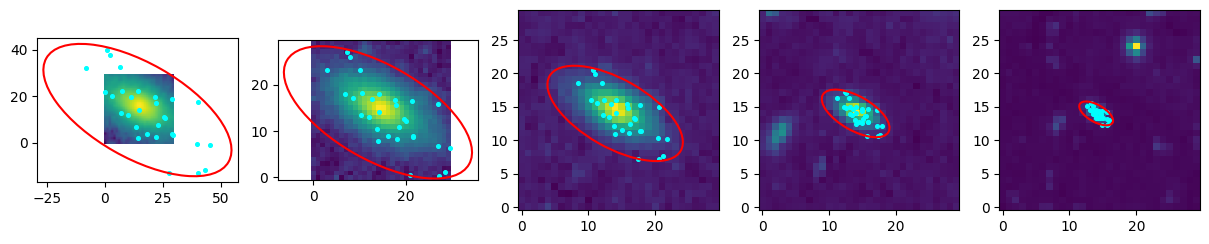

In [55]:
# Graficamos el host con las 30 posiciones generadas
# En este caso 'pos' es el array de las posiciones de las transientes hacia el host,
# por lo que las posiciones desde el host hacia las transientes seria '-pos'

augs = 30

fig, axs = plt.subplots(1,5, figsize=(15,5))
for i in range(5):
    axs[i].imshow(multi_host[i], origin="lower")
    axs[i].scatter(-pos[idx*augs:idx*augs + augs,0]/(2**i) +14, -pos[idx*augs:idx*augs + augs,1]/(2**i) +14, s=7, color="cyan")

    ellipse = Ellipse((14, 14),
                    width=B_pix * 2 * (3/(2**i)),
                    height=A_pix * 2 * (3/(2**i)),
                    angle=theta_sersic+90,
                    edgecolor='red',
                    facecolor='none',
                    lw=1.5,
                    linestyle='-')
    axs[i].add_patch(ellipse)
plt.show()

Veamos otros ejemplos

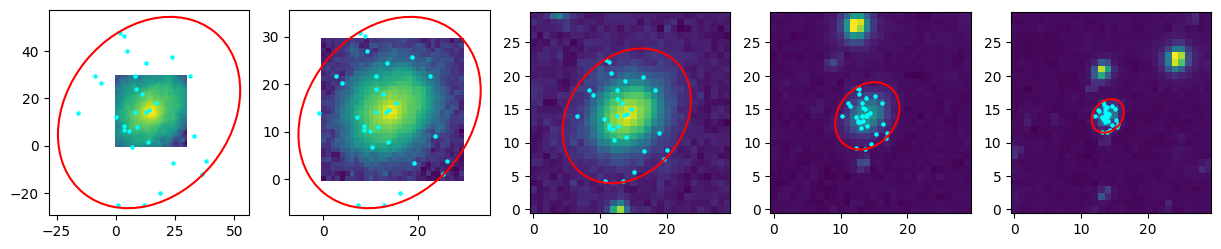

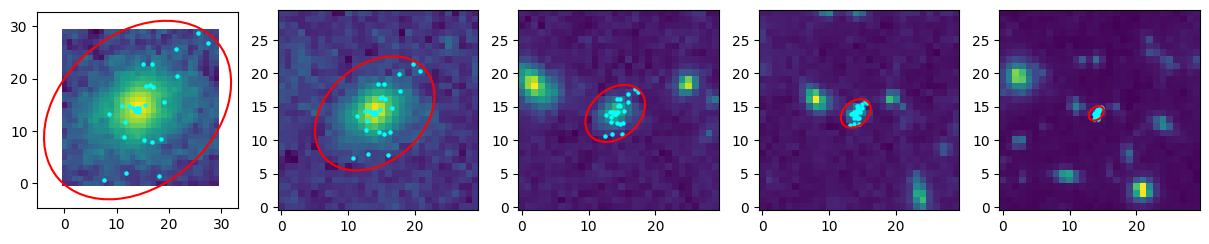

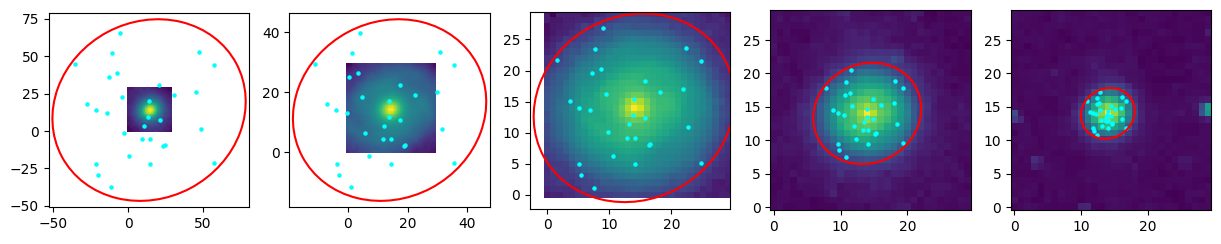

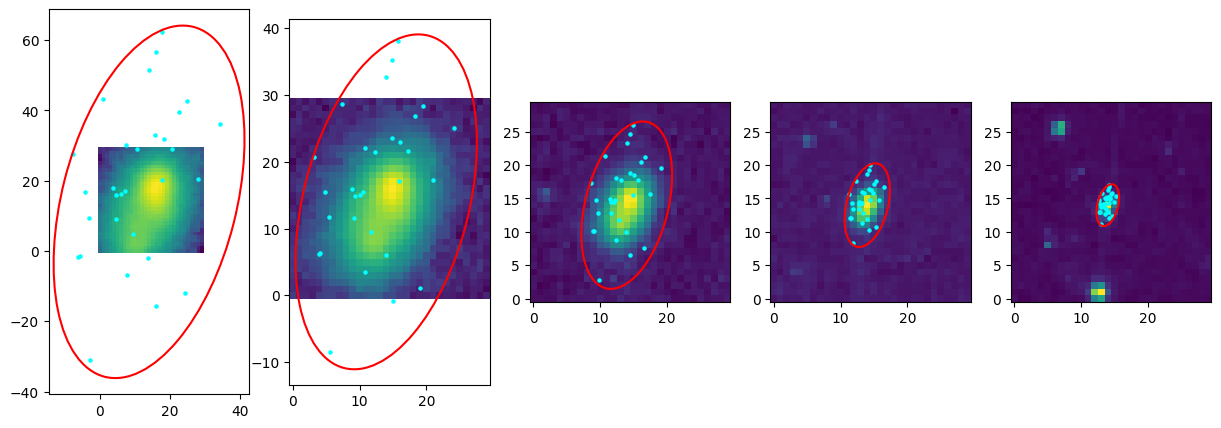

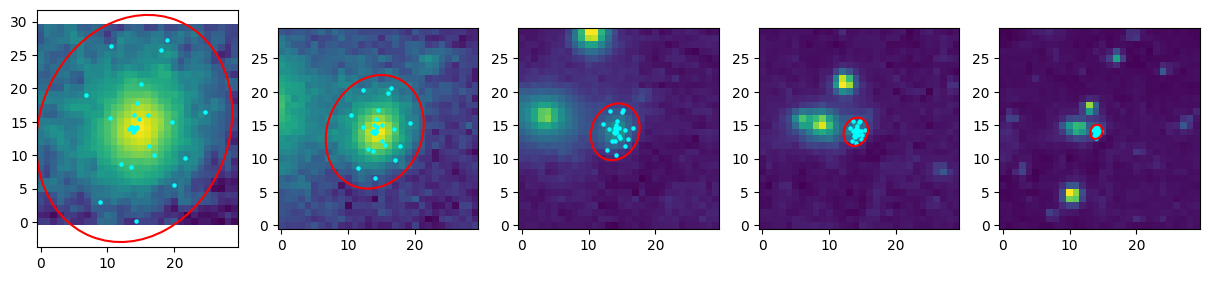

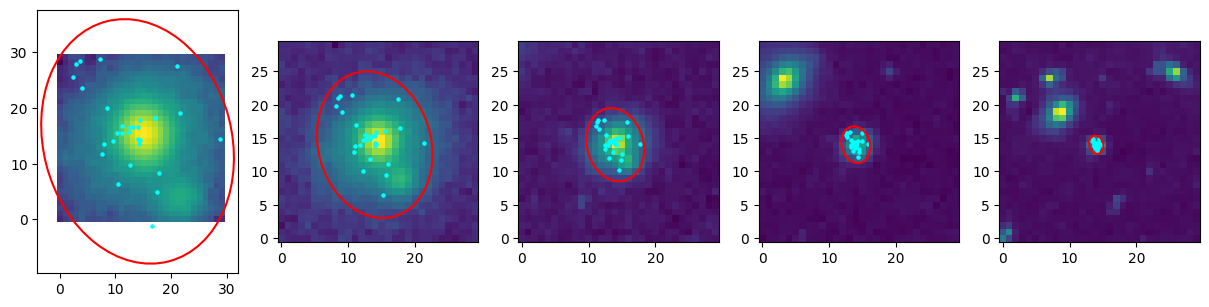

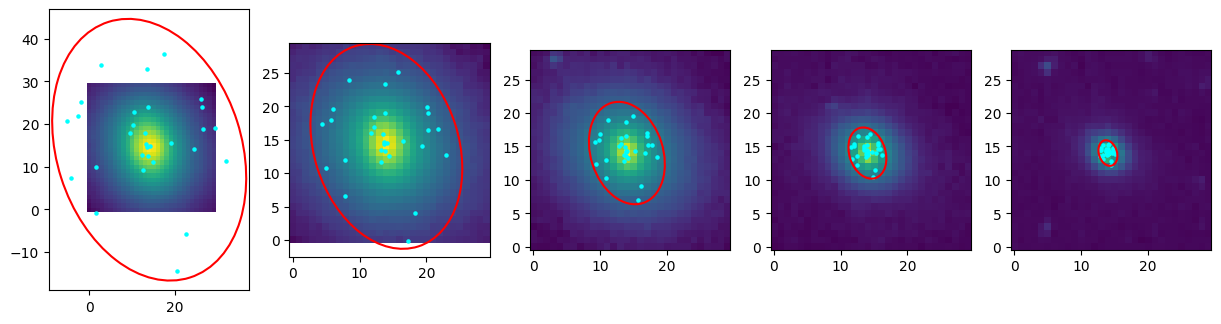

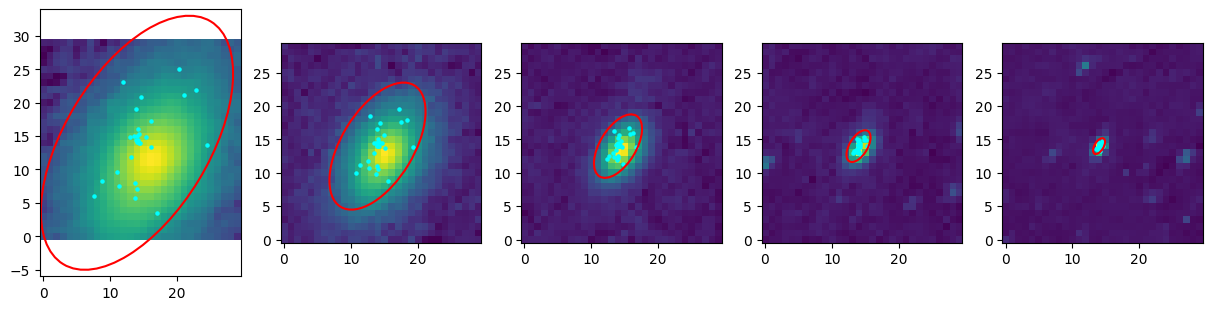

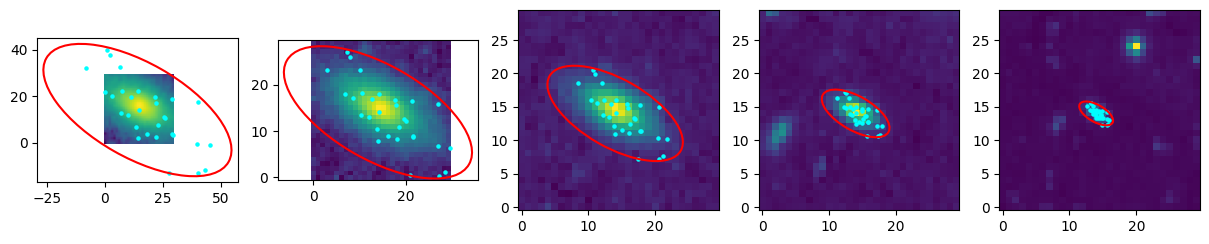

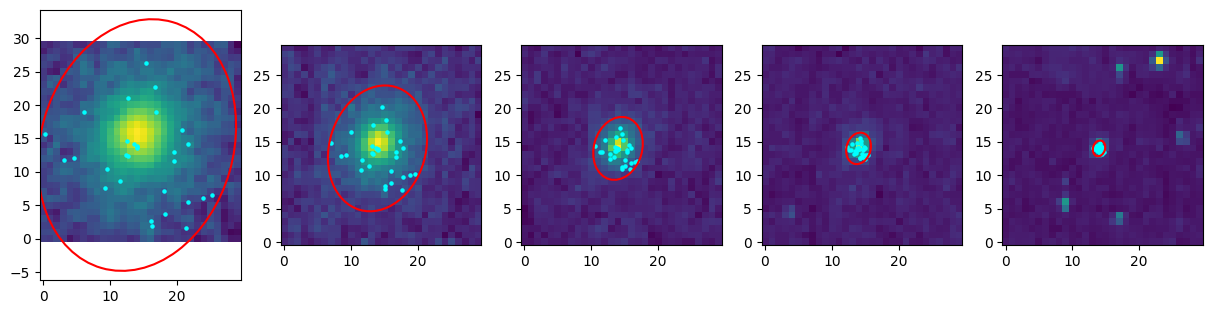

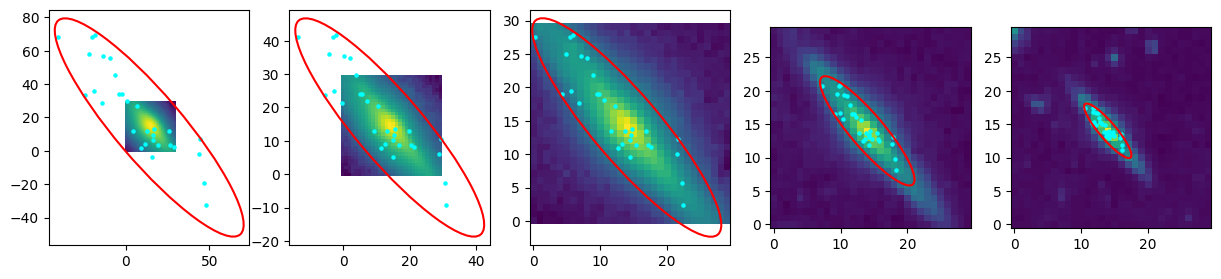

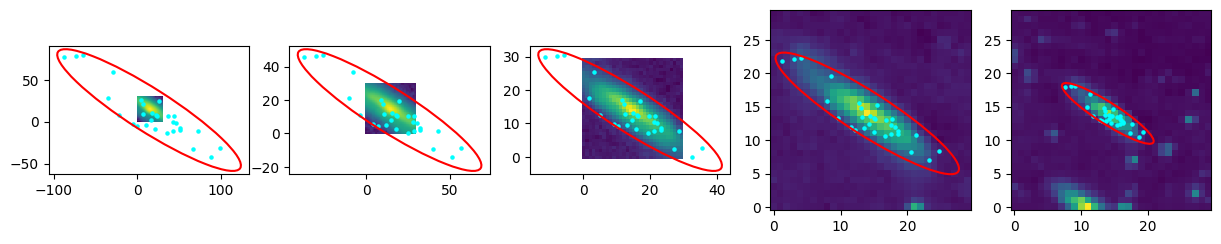

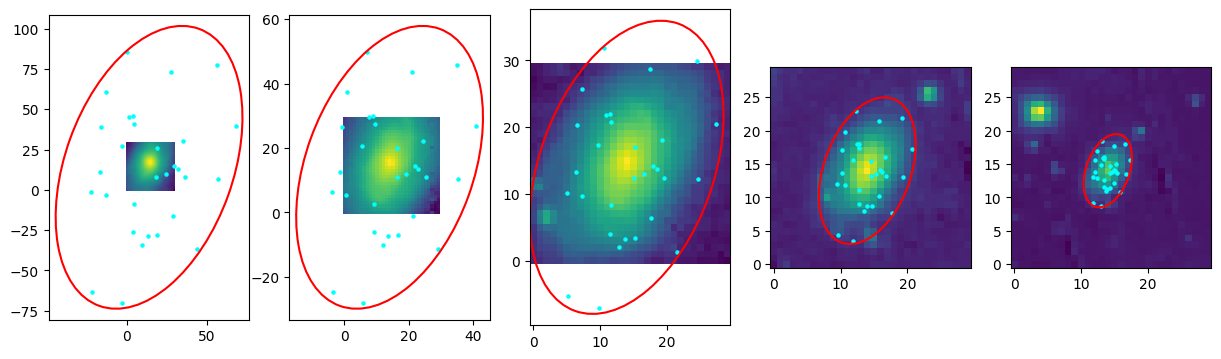

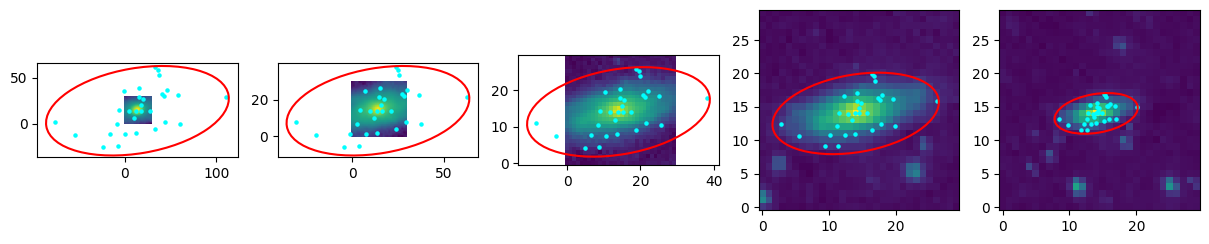

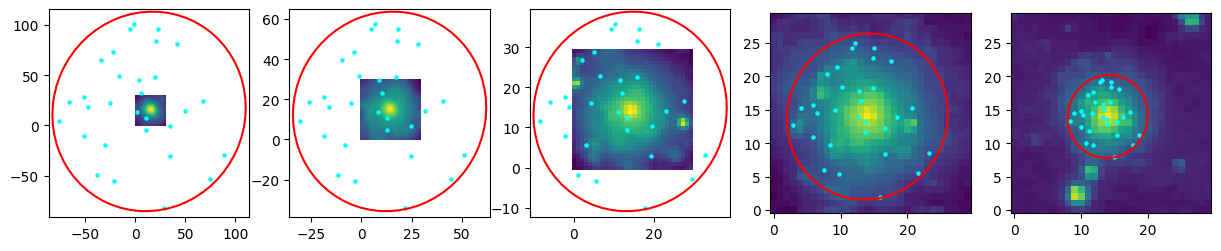

In [58]:
for idx in range(15):

    size=30
    row = df_train.iloc[idx]

    host_ra = row["host_ra"]
    host_dec = row["host_dec"]

    multi_host = []

    for i in range(5):
        img_host = get_galaxy_img(host_ra, host_dec, level=i, size=size)

        multi_host.append(img_host)

    multi_host= np.array(multi_host) 

    Re_arcsec = row["rSerRadius"]
    b_over_a = row["rSerAb"]
    theta_sersic = row["rSerPhi"]  
    pixel_scale = 0.25
    Re_pix = Re_arcsec / pixel_scale
    A_pix = Re_pix
    B_pix = A_pix * b_over_a

    augs = 30

    fig, axs = plt.subplots(1,5, figsize=(15,5))
    for i in range(5):
        axs[i].imshow(multi_host[i], origin="lower")
        axs[i].scatter(-pos[idx*augs:idx*augs + augs,0]/(2**i) +14, -pos[idx*augs:idx*augs + augs,1]/(2**i) +14, s=5, color="cyan")

        ellipse = Ellipse((14, 14),
                        width=B_pix * 2 * (3/(2**i)),
                        height=A_pix * 2 * (3/(2**i)),
                        angle=theta_sersic+90,
                        edgecolor='red',
                        facecolor='none',
                        lw=1.5,
                        linestyle='-')
        axs[i].add_patch(ellipse)
    plt.show()